# 1. 线性回归

## 1.1 单变量线性回归
### 单变量线性回归公式
$$h_{w,b}(x)=b+wx$$
$w$和$b$是参数，为了方便运算，可以给$x$加上一个$x_0$
$$h_{w,b}(x)=bx_{0}+wx_{1}$$
### 损失函数
$$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}(h_{w,b}(x^{(i)})-y^{(i)})^{2}$$
为了避免不恰当的数据范围带来损失过大或过小，在评估损失的时候，可以对$h_{w,b}(x^{(i)})$和$y^{(i)}$先进行标准化，使得损失数值在可评估的范围内。
**在进行梯度下降时，不进行此操作**
### 优化算法——梯度下降
$$w_j=w_{j}-\alpha\frac{\partial}{\partial{w_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})x^{(i)}}$$
$$b_j=b_{j}-\alpha\frac{\partial}{\partial{b_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})}$$

### python代码

In [75]:
import time

import matplotlib.pyplot as plt
import numpy as np

读取数据集

In [76]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

查看数据集

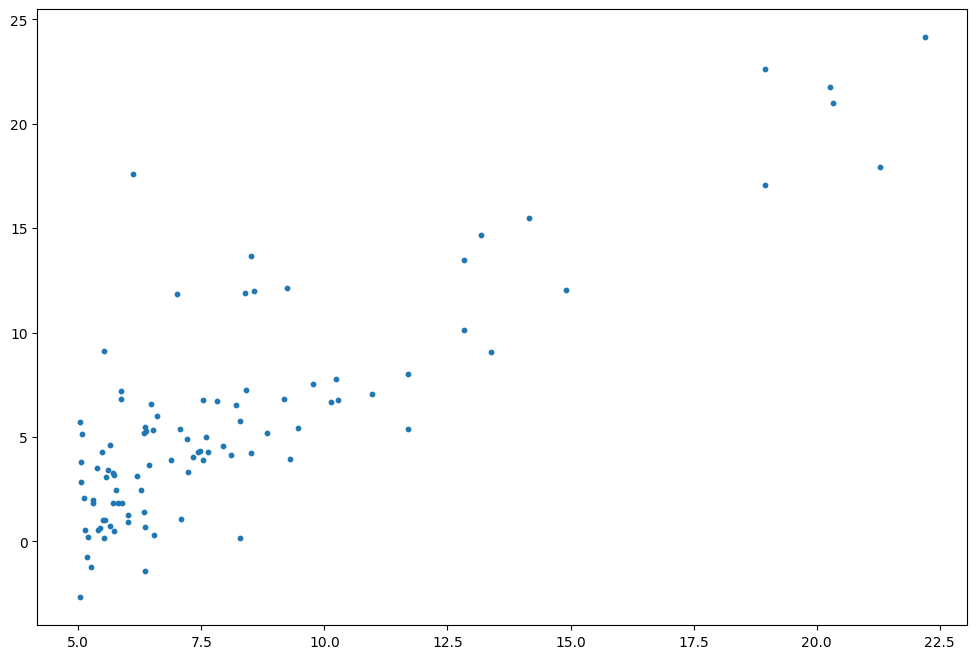

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=data[:, 0], y=data[:, 1], s=10)
plt.show()

分割训练集和验证集

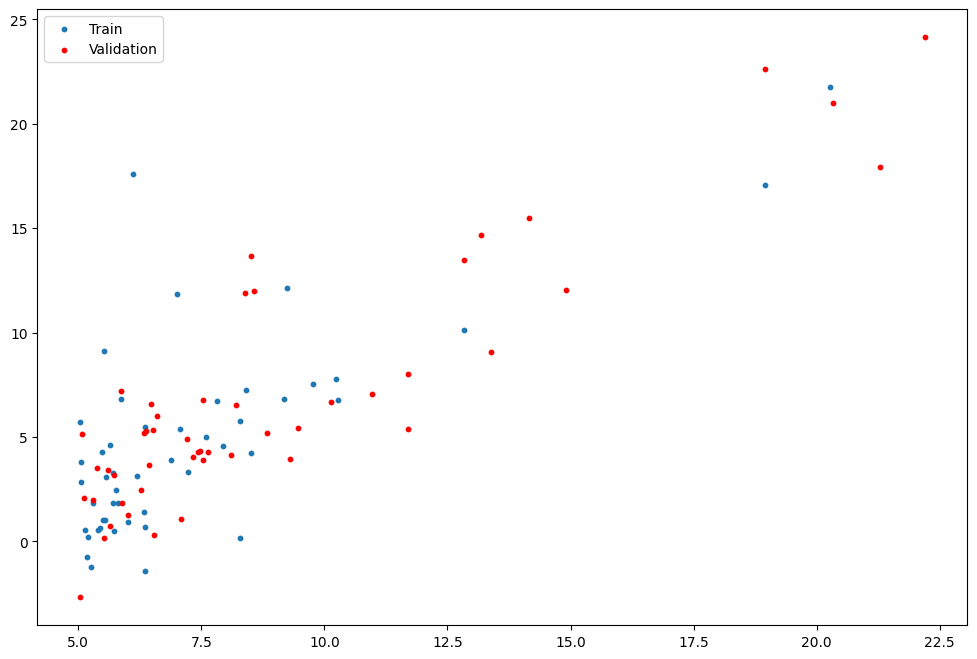

In [78]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, 0], data[:, 1], test_size=0.5)
# train_x, val_x, train_y, val_y = data[:, :-1], data[:, :-1], data[:, -1], data[:, -1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x, y=train_y, s=10, label="Train")
ax.scatter(x=val_x, y=val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()


扩展维度，从长度为$n$的向量变成$n\times 1$的矩阵

In [79]:
train_x_ex = np.expand_dims(train_x,axis=1)
train_y_ex = np.expand_dims(train_y,axis=1)
val_x_ex = np.expand_dims(val_x,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
train_x_ex

array([[ 7.2259],
       [ 5.0365],
       [ 6.3328],
       [ 5.4901],
       [ 7.8247],
       [ 5.2524],
       [ 8.5172],
       [ 5.7107],
       [ 6.002 ],
       [ 6.3589],
       [ 5.7292],
       [ 7.6031],
       [ 5.7077],
       [ 6.3557],
       [10.274 ],
       [ 5.8014],
       [ 9.2482],
       [ 5.5416],
       [ 5.0546],
       [ 5.4069],
       [ 8.2934],
       [ 5.0594],
       [ 6.3534],
       [ 6.1891],
       [ 7.0032],
       [ 5.1301],
       [18.959 ],
       [ 6.1101],
       [ 5.1793],
       [ 5.4369],
       [ 5.7737],
       [ 6.8825],
       [ 5.8598],
       [ 8.2951],
       [12.836 ],
       [ 9.7687],
       [ 5.1884],
       [20.27  ],
       [10.236 ],
       [ 9.1802],
       [ 5.4994],
       [ 5.3077],
       [ 5.5649],
       [ 7.9334],
       [ 7.0708],
       [ 5.6397],
       [ 8.4084],
       [ 5.5277]])

调入线性回归类，获得参数矩阵和训练损失序列，记录训练时间

**运行速度：**
原版本：循环计算每一个参数，进行更新
```
error = pred - y
repeat{
    theta[0,i]=theta[0,i] - ((alpha / len(X)) * np.sum(np.multiply(error, x[:,i])))
}
```
改进后：使用numpy的矩阵运算

In [80]:
from LinearRegression import LinearRegression

epochs = 200
alpha = 1
linear_reg = LinearRegression(x=train_x_ex,y=train_y_ex,val_x=val_x_ex, val_y=val_y_ex, lr=alpha,epoch=epochs)
start_time = time.time()
theta,loss, val_loss = linear_reg.train()
end_time = time.time()

theta

Epoch: 1/200	Train Loss: 23.2772	Val loss: 40.6888
Epoch: 2/200	Train Loss: 22.5382	Val loss: 39.6225
Epoch: 3/200	Train Loss: 21.8297	Val loss: 38.5935
Epoch: 4/200	Train Loss: 21.1503	Val loss: 37.6004
Epoch: 5/200	Train Loss: 20.4991	Val loss: 36.6418
Epoch: 6/200	Train Loss: 19.8746	Val loss: 35.7165
Epoch: 7/200	Train Loss: 19.2759	Val loss: 34.8232
Epoch: 8/200	Train Loss: 18.7019	Val loss: 33.9607
Epoch: 9/200	Train Loss: 18.1516	Val loss: 33.1279
Epoch: 10/200	Train Loss: 17.6239	Val loss: 32.3237
Epoch: 11/200	Train Loss: 17.1180	Val loss: 31.5470
Epoch: 12/200	Train Loss: 16.6330	Val loss: 30.7968
Epoch: 13/200	Train Loss: 16.1679	Val loss: 30.0721
Epoch: 14/200	Train Loss: 15.7221	Val loss: 29.3720
Epoch: 15/200	Train Loss: 15.2946	Val loss: 28.6956
Epoch: 16/200	Train Loss: 14.8848	Val loss: 28.0420
Epoch: 17/200	Train Loss: 14.4918	Val loss: 27.4103
Epoch: 18/200	Train Loss: 14.1151	Val loss: 26.7999
Epoch: 19/200	Train Loss: 13.7538	Val loss: 26.2098
Epoch: 20/200	Train L

array([[-3.64088362,  1.14823618]])

查看训练时间,计算在验证集上的损失

In [81]:
print("Train Time: {:.4f}s".format(end_time-start_time))
from LinearRegression import square_loss
pred_val = linear_reg.predict(val_x_ex)
loss_val = square_loss(pred_val, val_y_ex)
print("Val Loss: {:.4f}".format(loss_val))

Train Time: 0.0219s
Val Loss: 3.6549


使用sklearn库函数进行验证

In [82]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sk_start_time = time.time()
sklearn_lr.fit(train_x_ex,train_y_ex)
sk_end_time = time.time()

sk_theta = [sklearn_lr.intercept_[0],sklearn_lr.coef_[0, 0]]
sk_lr_pred = sklearn_lr.predict(val_x_ex)

from LinearRegression import square_loss
sk_loss_val = square_loss(sk_lr_pred, val_y_ex)
print("Sklearn Val Loss: {:.4f}".format(sk_loss_val))
print("Sklearn Parameters: ", sklearn_lr.intercept_, sklearn_lr.coef_)
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))

Sklearn Val Loss: 3.6289
Sklearn Parameters:  [-3.69571415] [[1.16552825]]
Sklearn Train Time: 0.0010s


画出预测的直线

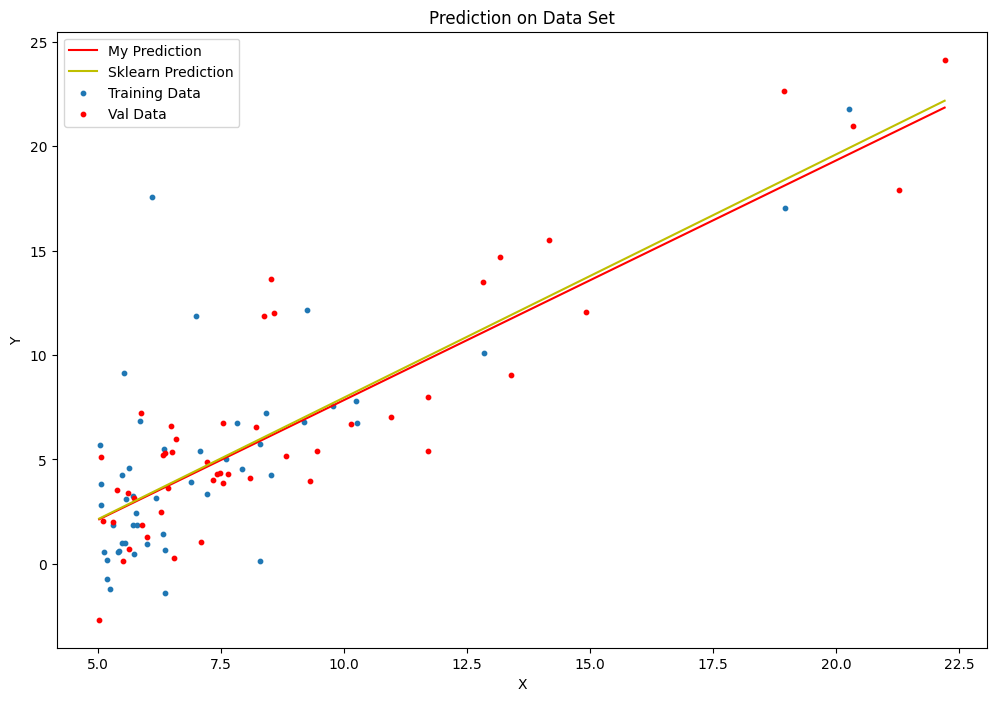

In [83]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)
f1 = sk_theta[0] + (sk_theta[1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='My Prediction')
ax.plot(x, f1, 'y', label='Sklearn Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

画出训练损失曲线

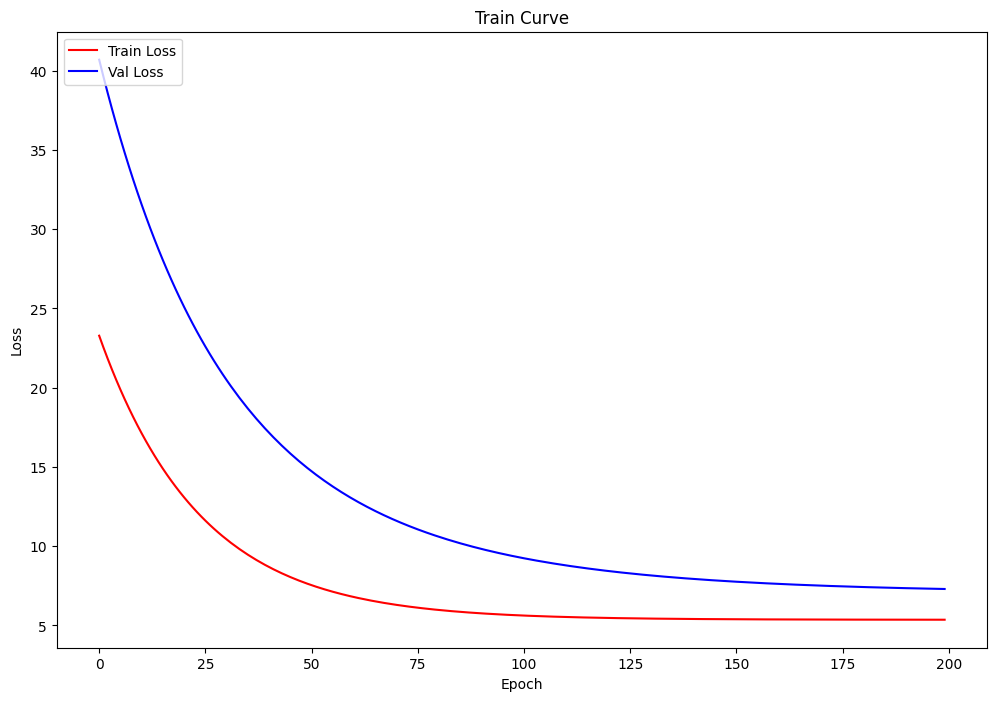

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epochs), loss, 'r', label="Train Loss")
ax.plot(np.arange(epochs), val_loss, 'b', label="Val Loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()

## 多变量线性回归
### 数据标准化
对数据进行标准化，能使得参数在合理的范围内，能更好地收敛，若不进行标准化，则会出现下图所示的情况
![](../imgs/standered.png)

加载数据集

In [85]:
data2 = np.loadtxt('ex1data2.txt', delimiter=',')
data2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

数据可视化

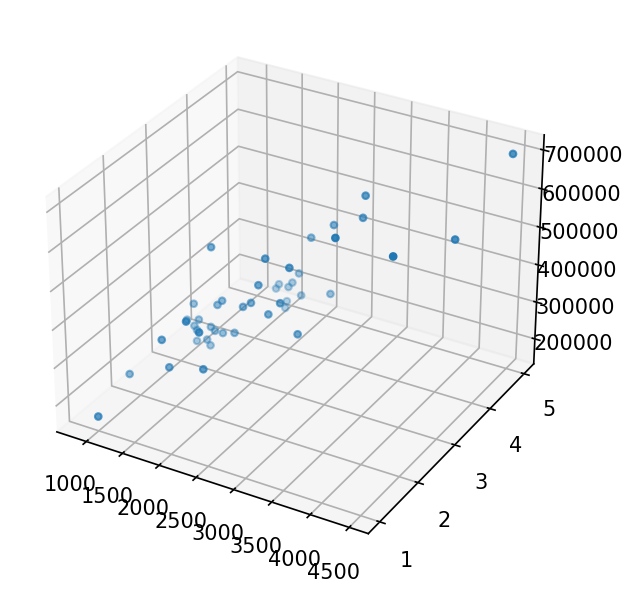

In [86]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data2[:,0],data2[:,1],data2[:,2],s=10)
plt.show()

划分训练集、验证集

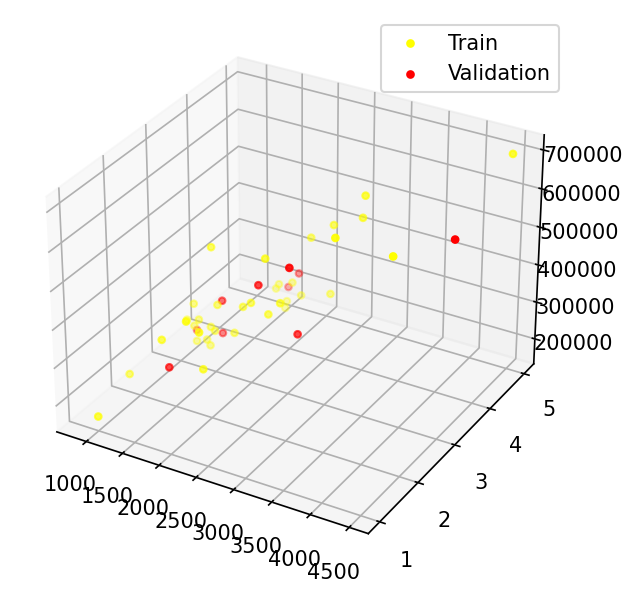

In [87]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data2[:, :2], data2[:, 2], test_size=0.2)
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

扩展y的维度 (n)->(n,1)

In [88]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

调用模型，训练，记录训练时间

In [89]:
from LinearRegression import LinearRegression

alpha = 0.5
epochs = 1000
multi_lr = LinearRegression(train_x,train_y_ex,val_x=val_x,val_y=val_y_ex, epoch=epochs,lr=alpha)
start_time = time.time()
theta, loss, val_loss = multi_lr.train()
end_time = time.time()
theta

Epoch: 1/1000	Train Loss: 66363595432.5270	Val loss: 62734973000.0000
Epoch: 2/1000	Train Loss: 64595651015.7726	Val loss: 61017387045.8150
Epoch: 3/1000	Train Loss: 62877735942.3897	Val loss: 59348808349.3830
Epoch: 4/1000	Train Loss: 61208389605.0822	Val loss: 57727800734.3721
Epoch: 5/1000	Train Loss: 59586195657.7795	Val loss: 56152971621.1183
Epoch: 6/1000	Train Loss: 58009780613.9246	Val loss: 54622970645.3879
Epoch: 7/1000	Train Loss: 56477812491.3763	Val loss: 53136488323.0516
Epoch: 8/1000	Train Loss: 54988999502.2981	Val loss: 51692254759.0655
Epoch: 9/1000	Train Loss: 53542088786.4634	Val loss: 50289038399.2160
Epoch: 10/1000	Train Loss: 52135865186.4645	Val loss: 48925644823.1404
Epoch: 11/1000	Train Loss: 50769150063.3690	Val loss: 47600915577.1902
Epoch: 12/1000	Train Loss: 49440800151.4201	Val loss: 46313727045.7535
Epoch: 13/1000	Train Loss: 48149706450.4265	Val loss: 45062989359.7081
Epoch: 14/1000	Train Loss: 46894793154.5394	Val loss: 43847645340.7197
Epoch: 15/1000	

array([[ 84144.25589145,    152.6345836 , -13578.29301434]])

查看训练时间
查看验证集损失

In [90]:
pred = multi_lr.predict(val_x)
multi_loss = square_loss(pred,val_y_ex)
print("Train Time: {:.4f}s".format(end_time-start_time))
print("Val Loss: {:.4f}".format(multi_loss))

Train Time: 0.1087s
Val Loss: 2316030885.8425


查看库函数的训练时间、损失和参数

In [91]:
from sklearn.linear_model import LinearRegression
sk_multi_lr = LinearRegression()
sk_start_time = time.time()
sk_multi_lr.fit(train_x,train_y_ex)
sk_end_time = time.time()

sk_lr_pred = sk_multi_lr.predict(val_x)
sk_loss = square_loss(sk_lr_pred,val_y_ex)
sk_theta = np.array([[sk_multi_lr.intercept_[0],sk_multi_lr.coef_[0,0],sk_multi_lr.coef_[0,1]]])
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("Sklearn parameters: ", sk_multi_lr.intercept_, sk_multi_lr.coef_)
print("Relative diff of Val loss: {:.2f}%".format((abs(multi_loss-sk_loss)/sk_loss)*100))

Sklearn Train Time: 0.0010s
Sklearn Val Loss: 2322298497.4278
Sklearn parameters:  [84429.4574949] [[   152.88453199 -13823.39274891]]
Relative diff of Val loss: 0.27%


结果可视化

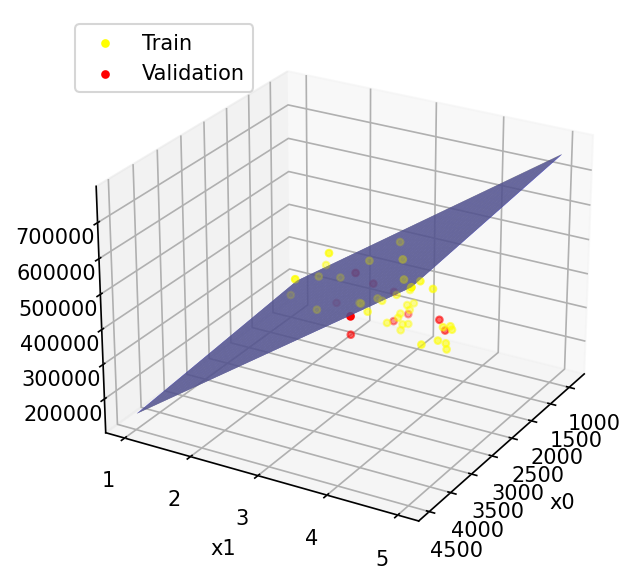

In [92]:
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
x = np.linspace(data2[:,0].min(), data2[:,0].max(), num=100)
y = np.linspace(data2[:,1].min(), data2[:,1].max(), num=100)

xx, yy = np.meshgrid(x, y)

z1 = np.zeros((100, 100))
z2 = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        z1[i,j] = theta[0,0] + theta[0,1] * x[i] + theta[0,2] * y[j]
        z2[i,j] = sk_theta[0,0] + sk_theta[0,1] * x[i] + sk_theta[0,2] * y[j]

ax.plot_surface(xx,yy,z1,alpha=0.8, rstride=3, cstride=1, color="blue")
ax.plot_surface(xx,yy,z2,alpha=0.8, rstride=3, cstride=1, color="gray")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.view_init(elev=25, azim=30)
plt.legend(loc=2)
plt.show()

训练过程可视化

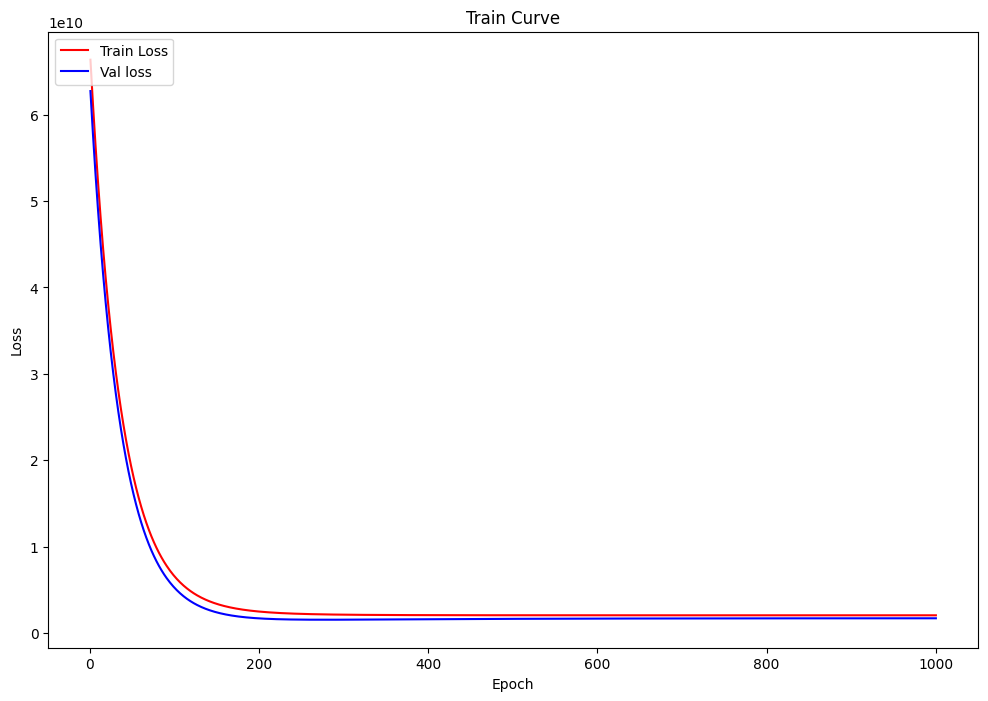

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), loss, 'r', label="Train Loss")
ax.plot(np.arange(1,epochs+1), val_loss, 'b', label="Val loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()